In [1]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv(r"C:\Users\Sameh Zaher\Desktop\New folder\Wuzzuf_Jobs.csv")
dataset.head()

,Title,Company,Location,Type,Level,YearsExp,Country,Skills
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ..."
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin..."
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ..."
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an..."
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain"


In [5]:
dataset["YearsExp"].value_counts()

1-3 Yrs of Exp      414
3-5 Yrs of Exp      390
3+ Yrs of Exp       309
2+ Yrs of Exp       259
5+ Yrs of Exp       238
                   ... 
6-12 Yrs of Exp       1
1-10 Yrs of Exp       1
0-7 Yrs of Exp        1
10-13 Yrs of Exp      1
4-9 Yrs of Exp        1
Name: YearsExp, Length: 101, dtype: int64

In [7]:
dataset["Factorize-YearsExp"] =pd.factorize(dataset["YearsExp"])[0]
dataset.head()

,Title,Company,Location,Type,Level,YearsExp,Country,Skills,Factorize-YearsExp
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ...",0
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin...",1
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ...",2
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an...",3
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain",4


In [8]:
dataset["Factorize-Title"] =pd.factorize(dataset["Title"])[0]
dataset["Factorize-Company"] =pd.factorize(dataset["Company"])[0]
dataset.head()

,Title,Company,Location,Type,Level,YearsExp,Country,Skills,Factorize-YearsExp,Factorize-Title,Factorize-Company
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ...",0,0,0
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin...",1,1,1
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ...",2,2,2
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an...",3,3,0
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain",4,4,3


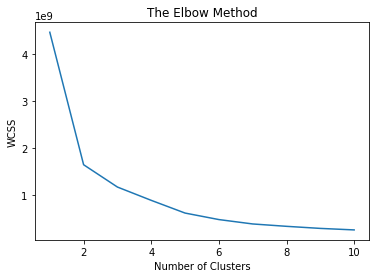

In [9]:
data = dataset.iloc[: ,[-2,-1]]
from sklearn.cluster import KMeans
wcss=[]
for i in  range (1 ,11):
    km = KMeans(n_clusters = i ,init ='k-means++' ,random_state = 42 ,max_iter = 500)
    km.fit(data)
    wcss.append(km.inertia_)
plt.plot(range(1,11) , wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()



In [10]:
km =KMeans(n_clusters =2 , init ='k-means++' ,random_state = 42)
y_mean = km.fit_predict(data)
y_mean

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
data['target'] = y_mean 
data.head() 

C:\Users\Sameh Zaher\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Factorize-Title,Factorize-Company,target
0,0,0,1
1,1,1,1
2,2,2,1
3,3,0,1
4,4,3,1


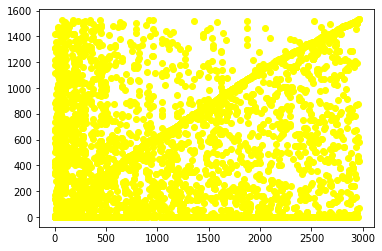

In [13]:
plt.scatter(data.iloc[:,0] , data.iloc[:,1] , color = 'yellow')
plt.show()

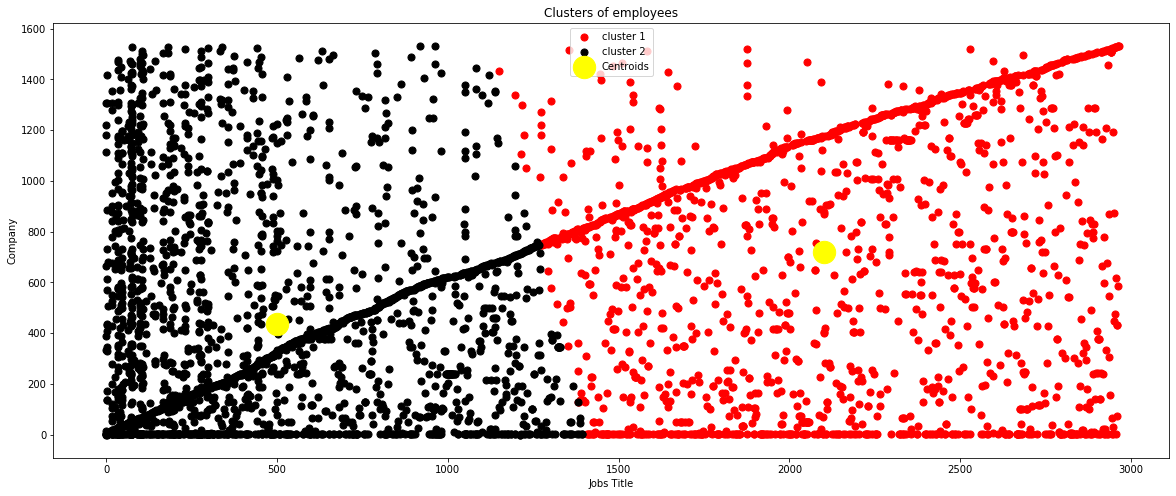

In [14]:
#filter rows of original data
filtered_label0 = data.loc[data.target == 0]
 
filtered_label1 = data.loc[data.target == 1]
 
#Plotting the results
plt.figure(figsize =(20 ,8))
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red' , s=50 , label ='cluster 1')
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'black' , s=50 ,label = 'cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s =500, c = 'yellow', label = 'Centroids')
plt.xlabel("Jobs Title")
plt.ylabel("Company")
plt.title("Clusters of employees")
plt.legend()
plt.show()